In [1]:
import pandas as pd
import numpy as np
# import math
# import os
from matplotlib import pyplot as plt
import sys
from scipy.interpolate import griddata
# from tqdm import tqdm
sys.path.append('/projects/DEIKE/jiarongw/jiarongw-postprocessing/jupyter_notebook/functions/')
# from fio import readin
# plt.style.use('/projects/DEIKE/jiarongw/jiarongw-postprocessing/media/matplotlib/stylelib/jfm.mplstyle')
plt.style.use('/projects/DEIKE/jiarongw/jiarongw-postprocessing/media/matplotlib/stylelib/thesis.mplstyle')
import timeit

In [2]:
from spectrum_func import spectrum_integration_log, spectrum_integration_linear
from spectrum_func import cart2pol

#### What happens if we compute the correlation from the simulation?

In [3]:
path = '/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_P0.02_RE40000_10_15_rand4_Htheta0.503/'
# path = '/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.01_RE40000_10_15_rand2_Htheta0.503/'

N = 1024; L = 200
x = np.linspace(-L/2,L/2,N); y = np.linspace(-L/2,L/2,N)

mean = []
for i in range(0,10):
    t = 180 + i
    filename = path + 'surface/eta_matrix_%g' %t
    eta = np.fromfile(filename, dtype=np.float32)
    eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]
    t = 180 + i + 0.1
    filename = path + 'surface/eta_matrix_%g' %t
    eta_new = np.fromfile(filename, dtype=np.float32)
    eta_new = eta_new.reshape(N+1,N+1); eta_new = eta_new[1:,1:]
    
    detadt = (eta_new - eta)/0.1
    detadx = np.gradient(eta, axis=0)/(x[1]-x[0])
    detady = np.gradient(eta, axis=1)/(x[1]-x[0])
    detadxdt = np.gradient(detadt, axis=0)/(x[1]-x[0])
    detadydt = np.gradient(detadt, axis=1)/(x[1]-x[0])
    print('<detadt*detadx> = %.4f, <detadt*detady> = %.4f, <etadetadtdx> = %.4f, <etadetadtdy> = %.4f' 
          %(np.average(detadt*detadx), np.average(detadt*detady), np.average(eta*detadxdt), np.average(eta*detadydt)))
    mean.append(np.average(detadt*detadx))
print(np.average(mean))

<detadt*detadx> = -0.0677, <detadt*detady> = 0.0011, <etadetadtdx> = 0.0677, <etadetadtdy> = -0.0011
<detadt*detadx> = -0.0677, <detadt*detady> = 0.0012, <etadetadtdx> = 0.0677, <etadetadtdy> = -0.0012
<detadt*detadx> = -0.0679, <detadt*detady> = 0.0011, <etadetadtdx> = 0.0679, <etadetadtdy> = -0.0011
<detadt*detadx> = -0.0679, <detadt*detady> = 0.0009, <etadetadtdx> = 0.0679, <etadetadtdy> = -0.0009
<detadt*detadx> = -0.0674, <detadt*detady> = 0.0008, <etadetadtdx> = 0.0674, <etadetadtdy> = -0.0008
<detadt*detadx> = -0.0668, <detadt*detady> = 0.0009, <etadetadtdx> = 0.0668, <etadetadtdy> = -0.0009
<detadt*detadx> = -0.0666, <detadt*detady> = 0.0009, <etadetadtdx> = 0.0666, <etadetadtdy> = -0.0009
<detadt*detadx> = -0.0669, <detadt*detady> = 0.0009, <etadetadtdx> = 0.0669, <etadetadtdy> = -0.0009
<detadt*detadx> = -0.0675, <detadt*detady> = 0.0010, <etadetadtdx> = 0.0675, <etadetadtdy> = -0.0010
<detadt*detadx> = -0.0678, <detadt*detady> = 0.0009, <etadetadtdx> = 0.0678, <etadetadtdy> 

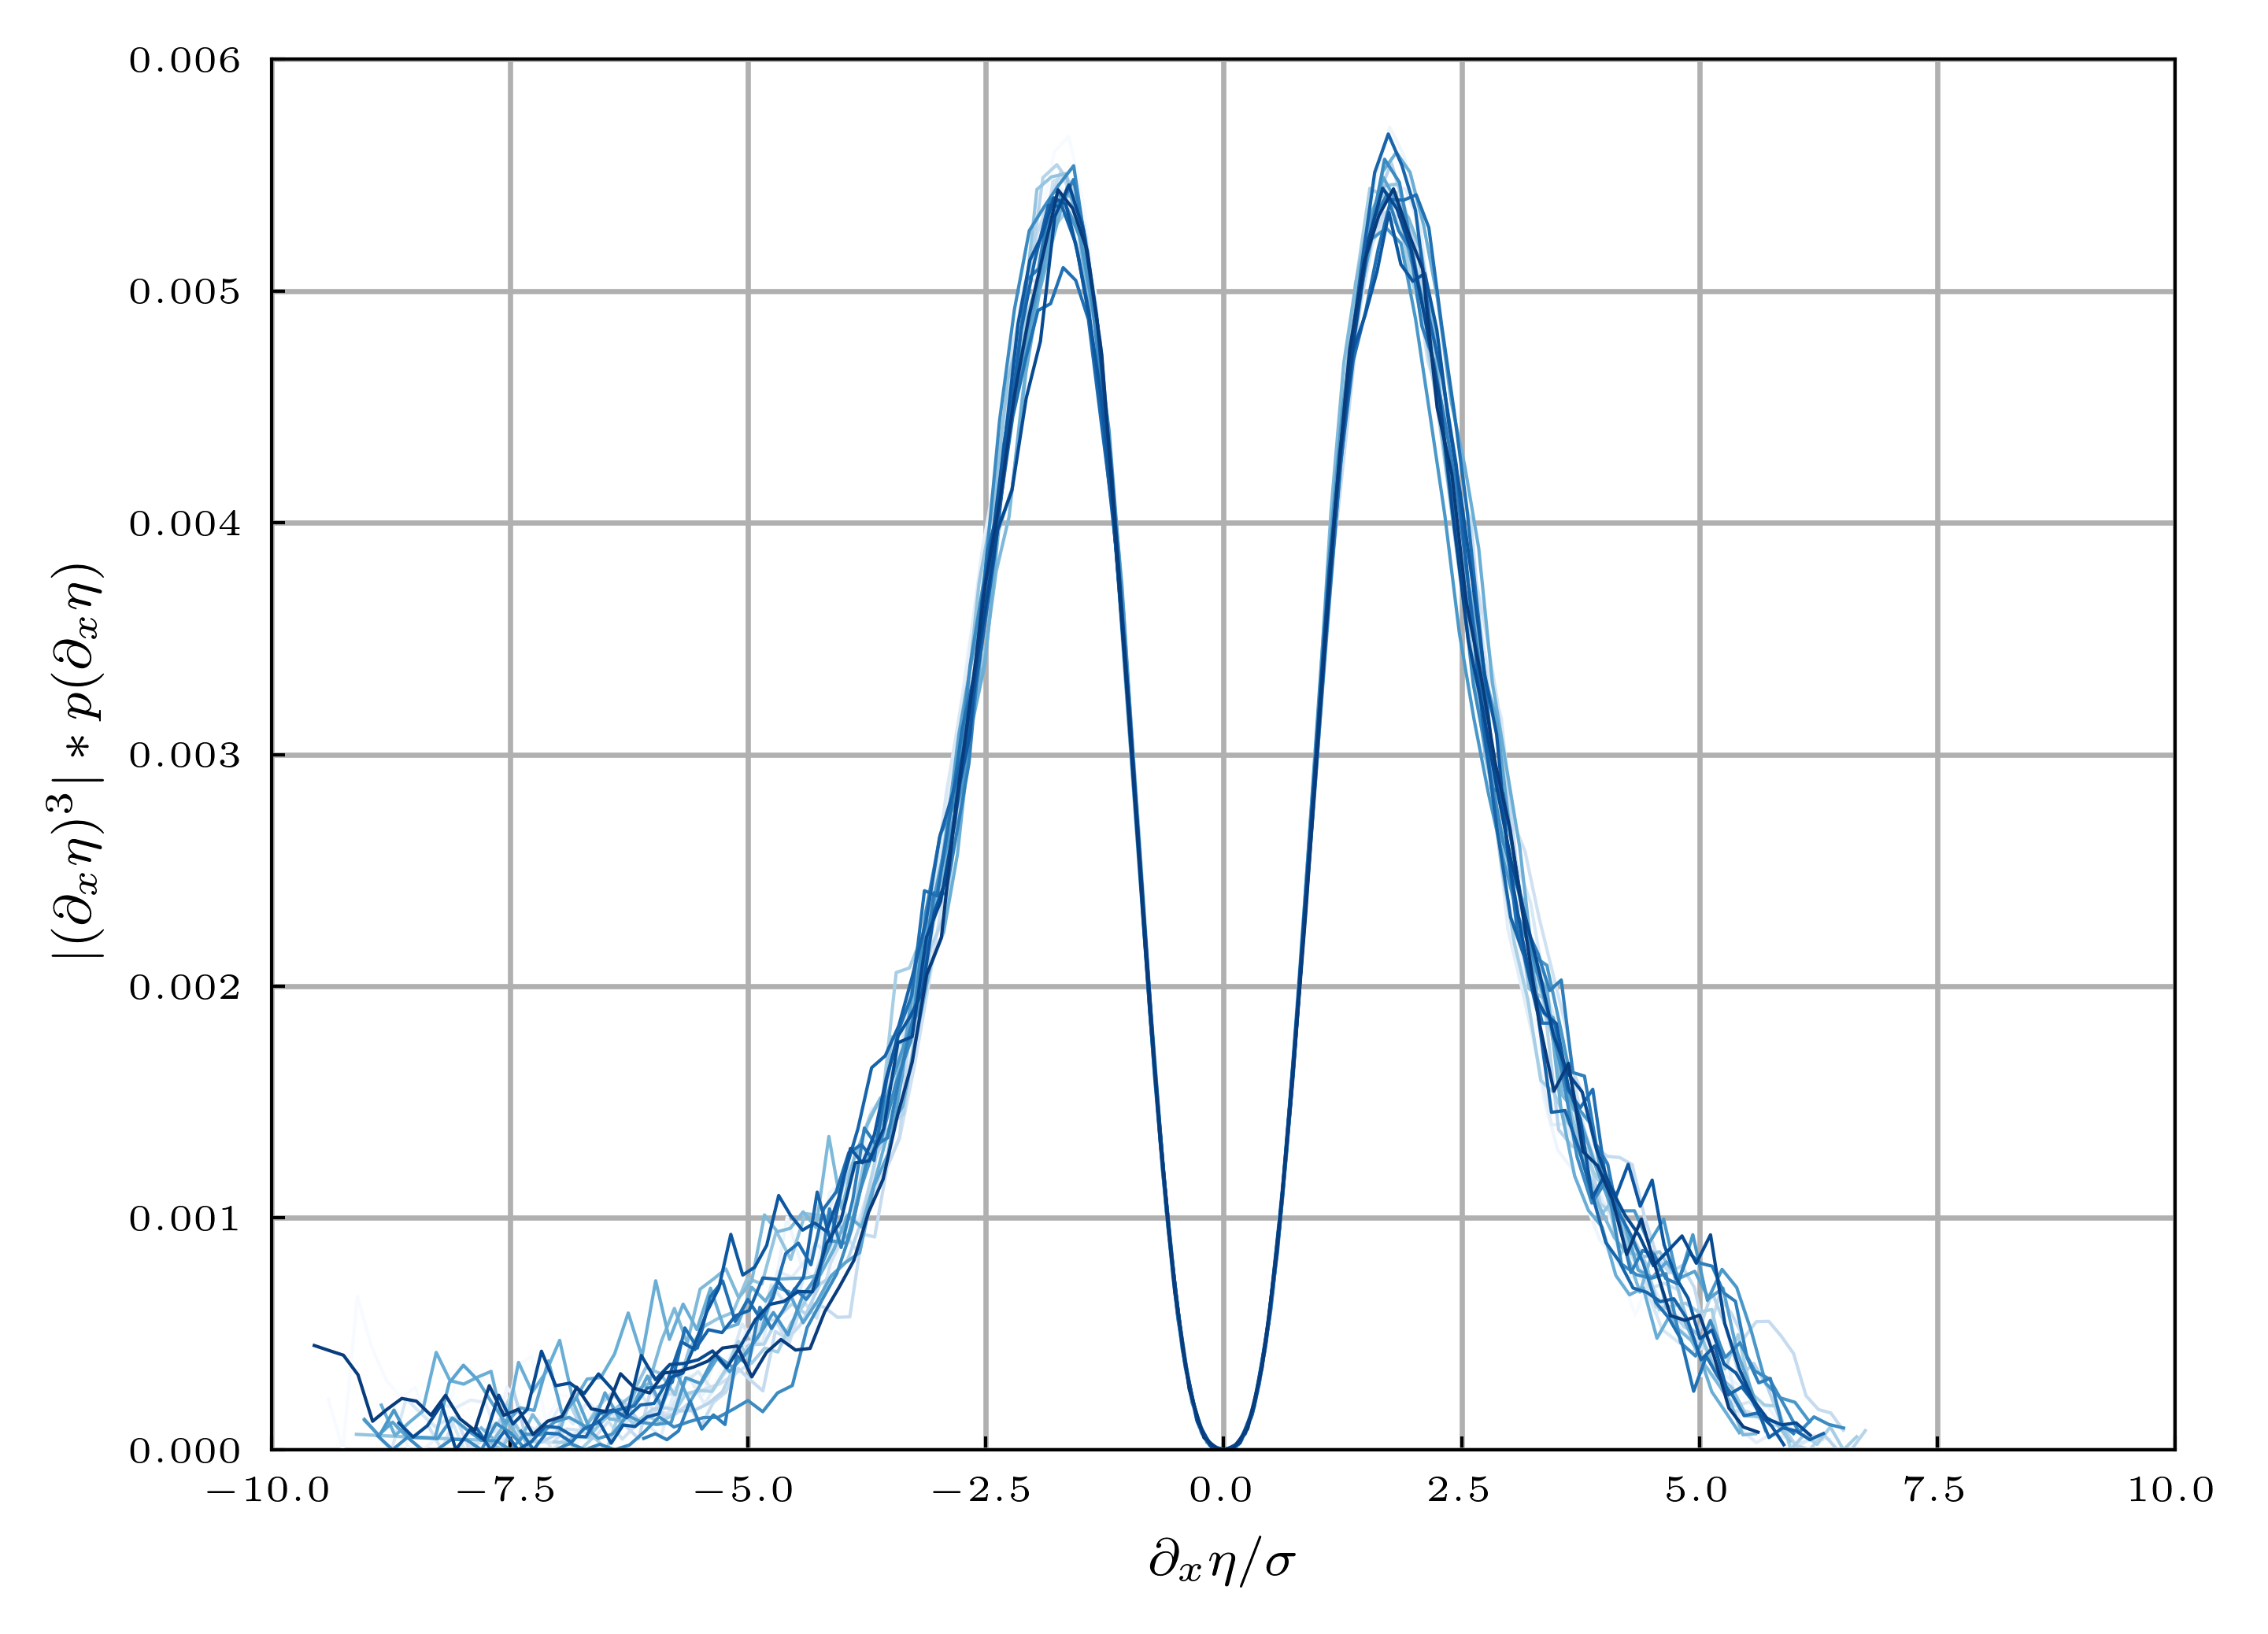

In [26]:
mean = []
for i in range(0,20):
    t = 180 + i
    filename = path + 'surface/eta_matrix_%g' %t
    eta = np.fromfile(filename, dtype=np.float32)
    eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]
    t = 180 + i + 0.1
    filename = path + 'surface/eta_matrix_%g' %t
    eta_new = np.fromfile(filename, dtype=np.float32)
    eta_new = eta_new.reshape(N+1,N+1); eta_new = eta_new[1:,1:]

    # Improve this: use the periodic 
    detadx = np.gradient(eta, axis=0)/(x[1]-x[0])
    hist, bins = np.histogram(detadx.flatten(), bins=100, density=True)
    center = (bins[:-1] + bins[1:]) / 2
    # plt.bar(center, hist, align='center', width=width)
    plt.plot(center/np.std(detadx), hist*np.abs(center)**3, c=plt.get_cmap('Blues')(i/20))
plt.grid()
plt.xlim([-10,10]); 
plt.ylim([0.,0.006])
plt.xlabel('$\partial_x \eta/\sigma$')
plt.ylabel('$|(\partial_x \eta)^3|*p(\partial_x\eta)$')
# plt.yscale('log')
plt.show()

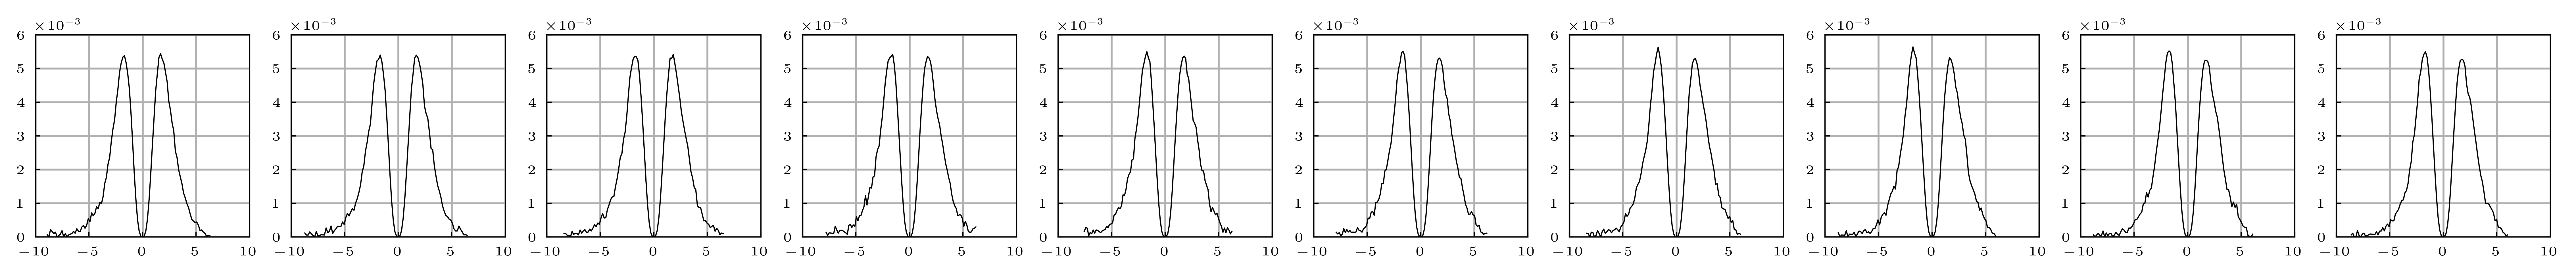

In [43]:
fig, axes = plt.subplots(1,10,figsize=[15,1.5],layout="constrained")
import matplotlib.ticker as mtick

for i in range(0,10):
    ax = axes[i]
    t = 183 + 0.1*i
    filename = path + 'surface/eta_matrix_%g' %t
    eta = np.fromfile(filename, dtype=np.float32)
    eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]

    # Improve this: use the periodic 
    detadx = np.gradient(eta, axis=0)/(x[1]-x[0])
    hist, bins = np.histogram(detadx.flatten(), bins=100, density=True)
    center = (bins[:-1] + bins[1:]) / 2
    # plt.bar(center, hist, align='center', width=width)
    ax.plot(center/np.std(detadx), hist*np.abs(center)**3, c='k')
    ax.grid()
    ax.set_xlim([-10,10]); 
    ax.set_ylim([0.,0.006]);
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#     ax.set_xlabel('$\partial_x \eta/\sigma$')
#     ax.set_ylabel('$|(\partial_x \eta)^3|*p(\partial_x\eta)$')
    # plt.yscale('log')
plt.show()

 <span style="color:red">
The two way of computing the msv is different and we should take $\eta\partial_{xt}eta$ instead of $\partial_x\eta\partial_{t}\eta$ as the former is the more relevant quantity.
</span>

#### Approximation from the spectrum
A first order approximation of $\langle \partial_t \eta \partial_x \eta \rangle$ is $-\int \omega k_x F(k_x,k_y) dk_xdk_y = -g^{1/2}\int k^{1/2} k_x F(k_x,k_y) dk_xdk_y $, which is not too far away from the simulation but slightly larger in amplitude.

In [19]:
filename = path + 'surface/eta_matrix_%g' %180
eta = np.fromfile(filename, dtype=np.float32)
eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]

wavenumber = 2*np.pi*np.fft.fftfreq(n=N,d=L/N)
spectrum = np.fft.fft2(eta) / (N*N)**0.5 # FFT normalization 
F = np.absolute(spectrum)**2 / N**2 # Per area normalization
kx = np.fft.fftshift(wavenumber); ky = kx
ky_tile, kx_tile = np.meshgrid(kx,ky) # So it seems like the order is ky_tile, kx_tile instead of kx_tile, ky_tile
kmod_tile = (kx_tile**2 + ky_tile**2)**0.5
dkx = kx[1] - kx[0]; dky = ky[1] - ky[0]
F_center = np.fft.fftshift(F)/dkx/dky # Further normalization by independent variables

c = 9.8**0.5*np.sum(kmod_tile**0.5*np.abs(kx_tile)*F_center*dkx*dky) # You need the absolute sign to make it work, but that's assuming mostly traveling to the right
print('First order approximated correlation eta*detadtdx is %.4f' %c)
c = 9.8**0.5*np.sum(kmod_tile**0.5*ky_tile*F_center*dkx*dky) # This won't work because we don't have directional information
print('First order approximated correlation eta*detadtdy is %.7f' %c)

First order approximated correlation eta*detadtdx is 0.0676
First order approximated correlation eta*detadtdy is -0.0000000


### Gaussian solution and Choppy solution
The idea is to generate a Gaussian random surface from the simulation spectrum and evolve it forward with the Choppy solution. Then we can compute the same statistics using the Choppy solution and see what the difference is. The following functions generate a Choppy solution at time t according to the equations written in the document.
It takes some time to run the for loop depending on how many wavenumbers we are keeping and the resolution of the field, so we clock it. <span style="color:red">
TO-DO: find a way to parallelize the summation, which should be straightforward. There is no exchange of information.
</span>

In [20]:
def eta_random(t, x_tile, y_tile, kx_tile, ky_tile, dkx, dky, F_kxky_tile, omega_tile, theta_tile, phase_tile):
    
    N_grid = x_tile.shape[0]
    ampl = (2 * F_kxky_tile * dkx * dky) ** 0.5
    eta = np.zeros(x_tile.shape)
    
    starttime = timeit.default_timer()
    print("Computing the summation...")
    for i1 in range(0, N_grid):
        for i2 in range(0, N_grid):
            a = (kx_tile*x_tile[i1,i2]+ky_tile*y_tile[i1,i2]) - omega_tile*t + phase_tile
            mode = ampl*(np.cos(a)) # uniform spacing in kx and ky
            eta[i1,i2] = np.sum(mode)  
    print("The summation took %g s" %(timeit.default_timer() - starttime)) 
    
    return eta

def choppy(t, x_tile, y_tile, kx_tile, ky_tile, dkx, dky, F_kxky_tile, omega_tile, theta_tile, phase_tile):
    
    N_grid = x_tile.shape[0]
    ampl = (2 * F_kxky_tile * dkx * dky) ** 0.5
    eta_new = np.zeros(x_tile.shape); xi1 = np.zeros(x_tile.shape); xi2 = np.zeros(x_tile.shape)
    
    starttime = timeit.default_timer()
    print("Computing the summation...")
    for i1 in range(0,N_grid):
        for i2 in range(0,N_grid):
            a = (kx_tile*x_tile[i1,i2]+ky_tile*y_tile[i1,i2]) - omega_tile*t + phase_tile # Notice here we take the -omega*t convention!
            mode = ampl*(np.cos(a)) # uniform spacing in kx and ky
            eta_new[i1,i2] = np.sum(mode)    
            xi1[i1,i2] = np.sum(-ampl*np.cos(theta_tile)*np.sin(a))
            xi2[i1,i2] = np.sum(-ampl*np.sin(theta_tile)*np.sin(a))
    print("The summation took %g s" %(timeit.default_timer() - starttime))      
    
    return eta_new, xi1, xi2

Here we pick the later time of a breaking field and compute its 2D spectrum. Notice that we should only use the right half of the kx plane so that we only keep the right-traveling waves.

In [70]:
# The case and time of choice
path = '/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_P0.02_RE40000_10_15_rand4_Htheta0.503/'
N = 1024; L = 200
t = 180 # choice of time
filename = path + 'surface/eta_matrix_%g' %t
eta = np.fromfile(filename, dtype=np.float32)
eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]

# Compute the FFT
wavenumber = 2*np.pi*np.fft.fftfreq(n=N,d=L/N)
spectrum = np.fft.fft2(eta) / (N*N)**0.5 # FFT normalization 
F = np.absolute(spectrum)**2 / N**2 # Per area normalization
kx = np.fft.fftshift(wavenumber); ky = kx
kx_tile, ky_tile = np.meshgrid(kx,ky)
dkx = kx[1] - kx[0]; dky = ky[1] - ky[0]
F_center = np.fft.fftshift(F)/dkx/dky # Further normalization by independent variables
kmod_cart_tile, theta_cart_tile = cart2pol(kx_tile,ky_tile)
omega_tile = (9.8*kmod_cart_tile)**0.5 # frequency based on kx or kmod
dkx = kx_tile[0,1]-kx_tile[0,0]; dky = ky_tile[1,0]-ky_tile[0,0]


# Generate the random phase that's shared throughout the compuation
np.random.seed(0) 
phase_tile = np.random.random_sample(kx_tile.shape) * 2 * np.pi

# The physical grid to generate the Gaussian field
N_grid = 512 # can play with this and see if any difference
L = 200
x = np.linspace(-L/2,L/2,N_grid); y = np.linspace(-L/2,L/2,N_grid)
x_tile, y_tile = np.meshgrid(x, y)

# We don't keep all the wavenumbers so that the summation is faster. A number around 200 and above should make little difference
d = 200
print('Keep wavenumber up to %g' %kx[int(N/2)+d])
# kx_tile_trunc = kx_tile[int(N/2)-d:int(N/2)+d,int(N/2)-d:int(N/2)+d]
# ky_tile_trunc = ky_tile[int(N/2)-d:int(N/2)+d,int(N/2)-d:int(N/2)+d]
# F_kxky_tile_trunc = F_center[int(N/2)-d:int(N/2)+d,int(N/2)-d:int(N/2)+d]
# omega_tile_trunc = omega_tile[int(N/2)-d:int(N/2)+d,int(N/2)-d:int(N/2)+d]
# theta_tile_trunc = theta_cart_tile[int(N/2)-d:int(N/2)+d,int(N/2)-d:int(N/2)+d]
# phase_tile_trunc = phase_tile[int(N/2)-d:int(N/2)+d,int(N/2)-d:int(N/2)+d]
''' Important: we should only keep the right-traveling modes '''
kx_tile_trunc = kx_tile[int(N/2):int(N/2)+d,int(N/2)-d:int(N/2)+d] # only keep the positive kx!
ky_tile_trunc = ky_tile[int(N/2):int(N/2)+d,int(N/2)-d:int(N/2)+d] # but keep both positive and negative ky!
F_kxky_tile_trunc = F_center[int(N/2):int(N/2)+d,int(N/2)-d:int(N/2)+d]*2 # Here we fold the other plane over so times 2
omega_tile_trunc = omega_tile[int(N/2):int(N/2)+d,int(N/2)-d:int(N/2)+d]
theta_tile_trunc = theta_cart_tile[int(N/2):int(N/2)+d,int(N/2)-d:int(N/2)+d]
phase_tile_trunc = phase_tile[int(N/2):int(N/2)+d,int(N/2)-d:int(N/2)+d]

# First order estimates based on the truncated spectrum
# You need the absolute sign to make it work, but that's assuming mostly traveling to the right
# Also I seem to have placed kx and ky in the wrong order in the meshgrid
c = 9.8**0.5*np.sum(kmod_tile[int(N/2):int(N/2)+d,int(N/2)-d:int(N/2)+d]**0.5*np.abs(ky_tile_trunc)*F_kxky_tile_trunc*dkx*dky)
print('First order approximated correlation eta*detadtdx is %.4f' %c)

Keep wavenumber up to 6.28319
First order approximated correlation eta*detadtdx is 0.0676


In [57]:
# These summations will take a while (up to a few minutes depending on the resolution)
eta_new1, deltax1, deltay1 = choppy(0.01, x_tile, y_tile, kx_tile_trunc, ky_tile_trunc, dkx, dky, 
                                    F_kxky_tile_trunc, omega_tile_trunc, theta_tile_trunc, phase_tile_trunc)
eta_new2, deltax2, deltay2 = choppy(0.02, x_tile, y_tile, kx_tile_trunc, ky_tile_trunc, dkx, dky, 
                                    F_kxky_tile_trunc, omega_tile_trunc, theta_tile_trunc, phase_tile_trunc)

Computing the summation...
The summation took 457.758 s
Computing the summation...
The summation took 455.997 s


Compute the statistics of $\langle \partial_x\eta\partial_t\eta \rangle$ (or $\langle \eta\partial_{xt}\eta \rangle$ which seems to be the same) using finite difference. For Gaussian this is directly computed on the original grid. For Choppy we need to first interpolate onto a regular grid. The sensitivity to interpolation, number of wavenumbers kept, grid numbers, etc have not been thoroughly studied.

In [58]:
# d = 200, Gaussian
detadt = (eta_new2 - eta_new1)/0.01
detadx = np.gradient(eta_new1, axis=0)/(x[1]-x[0])
detady = np.gradient(eta_new1, axis=1)/(x[1]-x[0])

print('<detadt*detadx> = %.4f, <detadt*detady> = %.4f, <detadt^2> = %.4f, <detadx^2> = %.4f' 
      %(np.average(detadt*detadx), np.average(detadt*detady), np.var(detadt), np.var(detadx)))

<detadt*detadx> = -0.0665, <detadt*detady> = 0.0008, <detadt^2> = 0.3753, <detadx^2> = 0.0135


In [59]:
# d = 200, Gaussian, a different way of computing msv?
detadt = (eta_new2 - eta_new1)/0.01
detadtdx = np.gradient(detadt, axis=0)/(x[1]-x[0])
detadtdy = np.gradient(detadt, axis=1)/(x[1]-x[0])

print('<eta*detadtdx> = %.4f, <etadetadtdy> = %.4f, <detadt^2> = %.4f, <detadx^2> = %.4f' 
      %(np.average(eta_new2*detadtdx), np.average(eta_new2*detadtdy), np.var(detadt), np.var(detadx)))

<eta*detadtdx> = 0.0665, <etadetadtdy> = -0.0008, <detadt^2> = 0.3753, <detadx^2> = 0.0135


Indeed they are the same for an Gaussian field (why of a different sign though?), but they are different for a non Gaussian field.

In [77]:
# d = 200 Choppy after interpolation
from scipy.interpolate import LinearNDInterpolator

N_grid_interp = 1024; L = 200 # We can change this and there is a small difference
x_interp = np.linspace(-L/2,L/2,N_grid_interp); y_interp = np.linspace(-L/2,L/2,N_grid_interp)
x_tile_interp, y_tile_interp = np.meshgrid(x_interp, y_interp)

x_choppy1 = x_tile + deltax1
y_choppy1 = y_tile + deltay1
interp = LinearNDInterpolator(list(zip(x_choppy1.flatten(), y_choppy1.flatten())), eta_new1.flatten(), fill_value=0)
# np.isnan(eta_new_interp)
eta_new_interp1 = interp(x_tile_interp, y_tile_interp)

x_choppy2 = x_tile + deltax2
y_choppy2 = y_tile + deltay2
interp = LinearNDInterpolator(list(zip(x_choppy2.flatten(), y_choppy2.flatten())), eta_new2.flatten(), fill_value=0)
# np.isnan(eta_new_interp)
eta_new_interp2 = interp(x_tile_interp, y_tile_interp)

detadt = (eta_new_interp2 - eta_new_interp1)/0.01
detadx = np.gradient(eta_new_interp1, axis=0)/(x_interp[1]-x_interp[0])
detady = np.gradient(eta_new_interp1, axis=1)/(x_interp[1]-x_interp[0])

trunc = 20 # in case the borders are not interpolated correctly
print('<detadt*detadx> = %.4f, <detadt*detady> = %.4f, <detadt^2> = %.4f, <detadx^2> = %.4f' 
      %(np.average(detadt[trunc:-trunc]*detadx[trunc:-trunc]), np.average(detadt[trunc:-trunc]*detady[trunc:-trunc]), np.var(detadt), np.var(detadx)))
trunc = 10 # in case the borders are not interpolated correctly
print('<detadt*detadx> = %.4f, <detadt*detady> = %.4f, <detadt^2> = %.4f, <detadx^2> = %.4f' 
      %(np.average(detadt[trunc:-trunc]*detadx[trunc:-trunc]), np.average(detadt[trunc:-trunc]*detady[trunc:-trunc]), np.var(detadt), np.var(detadx)))
trunc = 1 # in case the borders are not interpolated correctly
print('<detadt*detadx> = %.4f, <detadt*detady> = %.4f, <detadt^2> = %.4f, <detadx^2> = %.4f' 
      %(np.average(detadt[trunc:-trunc]*detadx[trunc:-trunc]), np.average(detadt[trunc:-trunc]*detady[trunc:-trunc]), np.var(detadt), np.var(detadx)))

trunc = 10 # in case the borders are not interpolated correctly
detadtdx = np.gradient(detadt, axis=0)/(x_interp[1]-x_interp[0])
detadtdy = np.gradient(detadt, axis=1)/(x_interp[1]-x_interp[0])

print('<eta*detadtdx> = %.4f, <etadetadtdy> = %.4f, <detadt^2> = %.4f, <detadx^2> = %.4f' 
      %(np.average(eta_new_interp2[trunc:-trunc]*detadtdx[trunc:-trunc]), np.average(eta_new_interp2[trunc:-trunc]*detadtdy[trunc:-trunc]), np.average(detadt), np.average(detadx)))
print('<eta*detadtdx> = %.4f, <etadetadtdy> = %.4f, <detadt^2> = %.4f, <detadx^2> = %.4f' 
      %(np.average(eta_new_interp1[trunc:-trunc]*detadtdx[trunc:-trunc]), np.average(eta_new_interp1[trunc:-trunc]*detadtdy[trunc:-trunc]), np.average(detadt), np.average(detadx)))

<detadt*detadx> = -0.0659, <detadt*detady> = 0.0007, <detadt^2> = 0.6396, <detadx^2> = 0.0146
<detadt*detadx> = -0.0660, <detadt*detady> = 0.0008, <detadt^2> = 0.6396, <detadx^2> = 0.0146
<detadt*detadx> = -0.0683, <detadt*detady> = 0.0009, <detadt^2> = 0.6396, <detadx^2> = 0.0146
<eta*detadtdx> = 0.0663, <etadetadtdy> = -0.0004, <detadt^2> = -0.0068, <detadx^2> = -0.0000
<eta*detadtdx> = 0.0663, <etadetadtdy> = -0.0003, <detadt^2> = -0.0068, <detadx^2> = -0.0000


### Some visualizations

/tmp/ipykernel_15903/2183315317.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  axes[0].pcolormesh(y_tile + deltay1, x_tile + deltax1, eta_new1, cmap='RdBu_r', vmax=1.6, vmin=-1.6)
/tmp/ipykernel_15903/2183315317.py:5: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  axes[1].pcolormesh(y_tile + deltay2, x_tile + deltax2, eta_new2, cmap='RdBu_r', vmax=1.6, vmin=-1.6)


Text(0.5, 1.0, '$\\Delta t = 0.2s$')

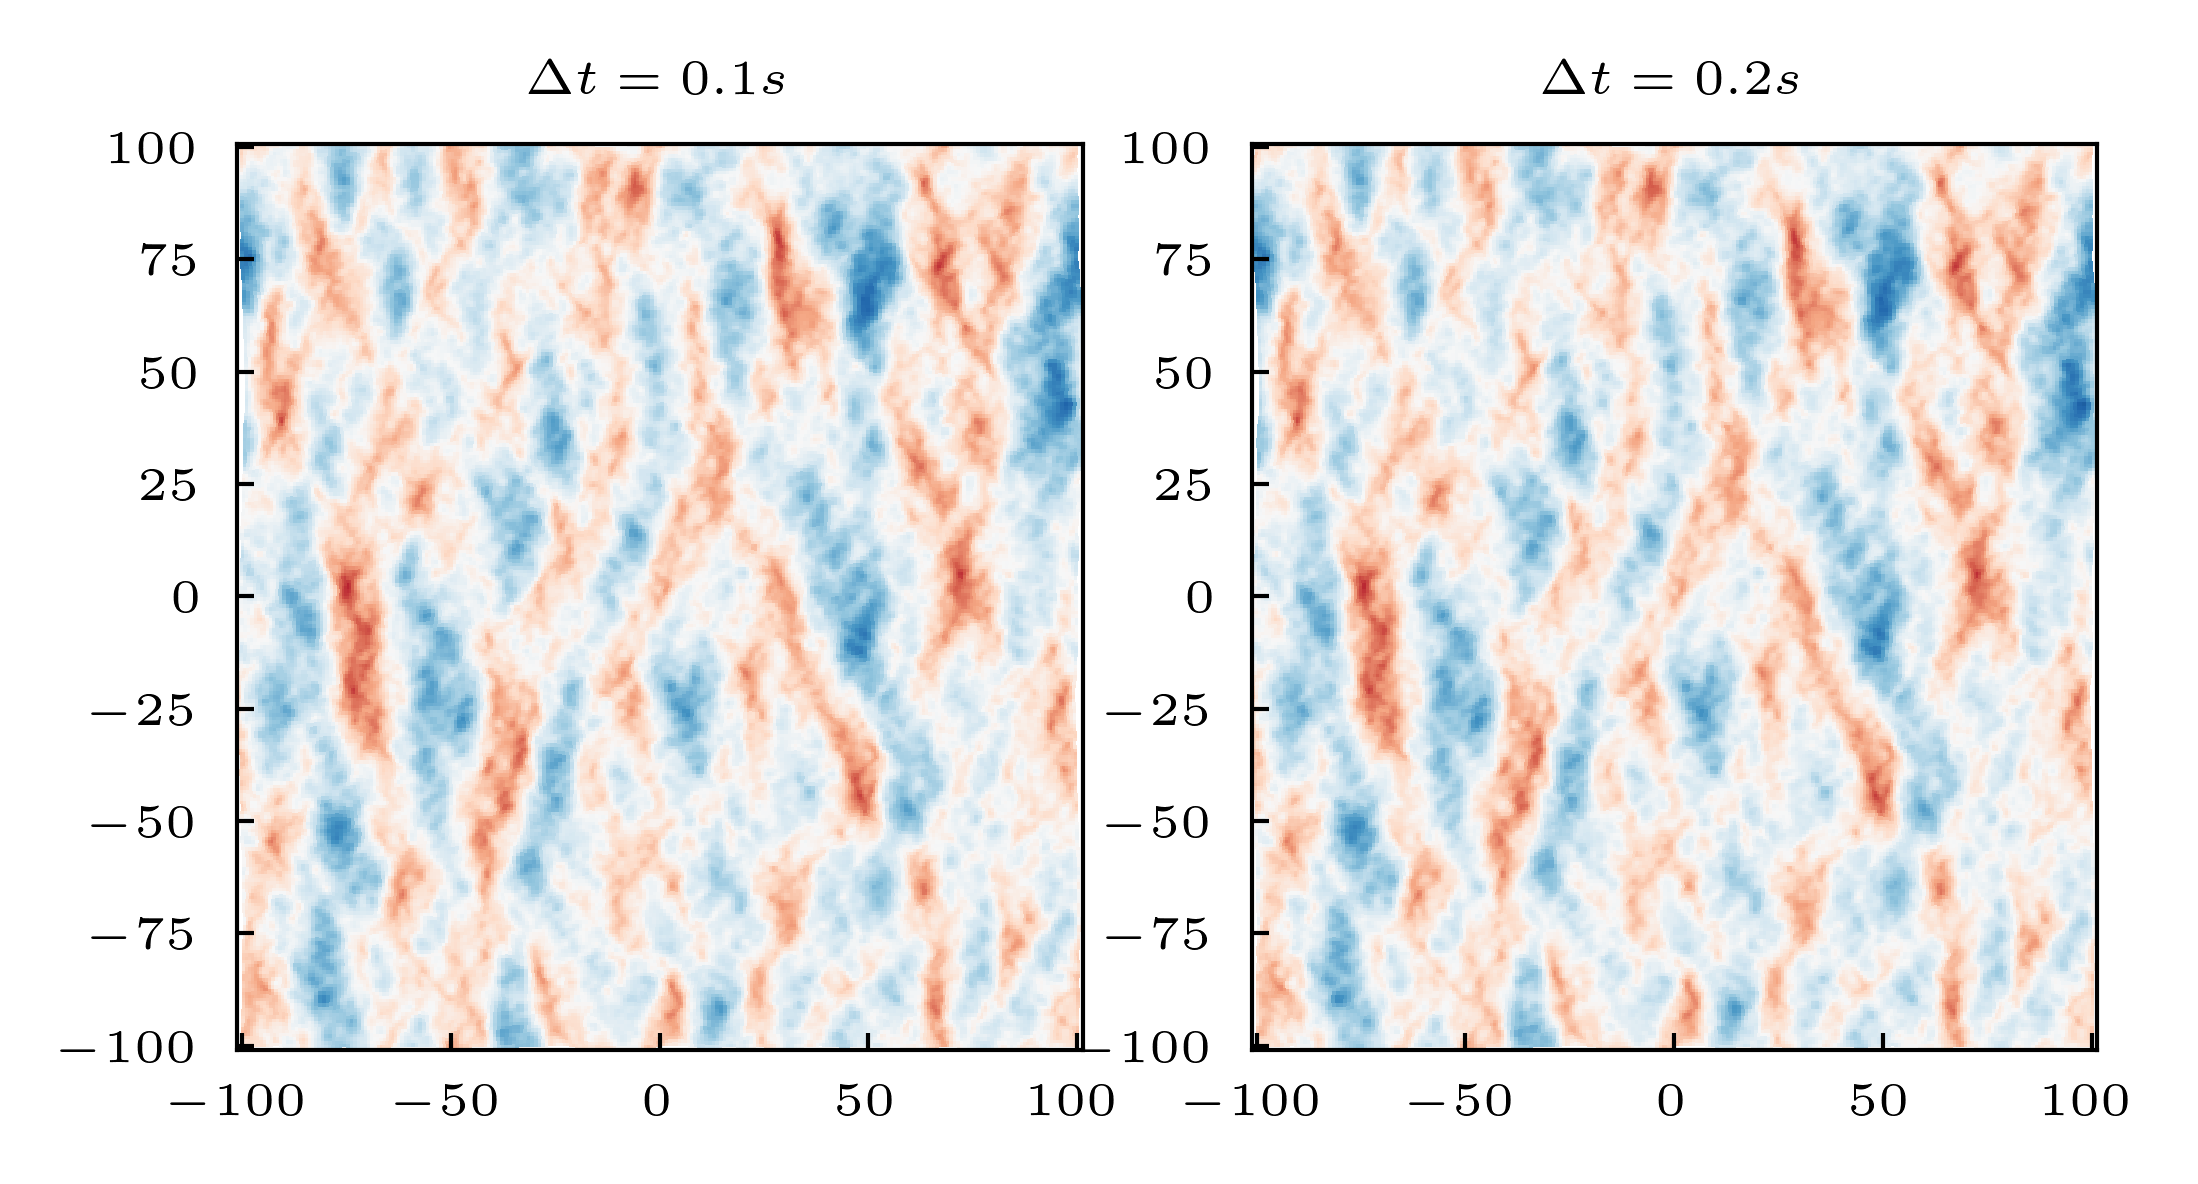

In [40]:
# Choppy at different times
fig, axes = plt.subplots(1,2,figsize=[4,2])
axes[0].pcolormesh(y_tile + deltay1, x_tile + deltax1, eta_new1, cmap='RdBu_r', vmax=1.6, vmin=-1.6)
# axes[0].set_xticks([], []); axes[0].set_yticks([], [])
axes[0].set_title('$\Delta t = 0.1s$', fontsize=6)
axes[1].pcolormesh(y_tile + deltay2, x_tile + deltax2, eta_new2, cmap='RdBu_r', vmax=1.6, vmin=-1.6)
# axes[1].set_xticks([], []); axes[1].set_yticks([], [])
axes[1].set_title('$\Delta t = 0.2s$', fontsize=6)

In [29]:
# The case and time of choice
path = '/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_P0.02_RE40000_10_15_rand4_Htheta0.503/'
N = 1024; L = 200
t = 180 # choice of time
filename = path + 'surface/eta_matrix_%g' %t
eta = np.fromfile(filename, dtype=np.float32)
eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]

# Compute the FFT
wavenumber = 2*np.pi*np.fft.fftfreq(n=N,d=L/N)
spectrum = np.fft.fft2(eta) / (N*N)**0.5 # FFT normalization 
F = np.absolute(spectrum)**2 / N**2 # Per area normalization
kx = np.fft.fftshift(wavenumber); ky = kx
kx_tile, ky_tile = np.meshgrid(kx,ky)
dkx = kx[1] - kx[0]; dky = ky[1] - ky[0]
F_center = np.fft.fftshift(F)/dkx/dky # Further normalization by independent variables
kmod_cart_tile, theta_cart_tile = cart2pol(kx_tile,ky_tile)
omega_tile = (9.8*kmod_cart_tile)**0.5 # frequency based on kx or kmod
dkx = kx_tile[0,1]-kx_tile[0,0]; dky = ky_tile[1,0]-ky_tile[0,0]

# Generate the random phase that's shared throughout the compuation
np.random.seed(0) 
phase_tile = np.random.random_sample(kx_tile.shape) * 2 * np.pi

# The physical grid to generate the Gaussian field
N_grid = 256 # can play with this and see if any difference
L = 200
x = np.linspace(-L/2,L/2,N_grid); y = np.linspace(-L/2,L/2,N_grid)
x_tile, y_tile = np.meshgrid(x, y)

# We don't keep all the wavenumbers so that the summation is faster. A number around 200 and above should make little difference
d = 80
print('Keep wavenumber up to %g' %kx[int(N/2)+d])
''' Important: we should only keep the right-traveling modes '''
kx_tile_trunc = kx_tile[int(N/2):int(N/2)+d,int(N/2)-d:int(N/2)+d] # only keep the positive kx!
ky_tile_trunc = ky_tile[int(N/2):int(N/2)+d,int(N/2)-d:int(N/2)+d] # but keep both positive and negative ky!
F_kxky_tile_trunc = F_center[int(N/2):int(N/2)+d,int(N/2)-d:int(N/2)+d]*2 # Here we fold the other plane over so times 2
omega_tile_trunc = omega_tile[int(N/2):int(N/2)+d,int(N/2)-d:int(N/2)+d]
theta_tile_trunc = theta_cart_tile[int(N/2):int(N/2)+d,int(N/2)-d:int(N/2)+d]
phase_tile_trunc = phase_tile[int(N/2):int(N/2)+d,int(N/2)-d:int(N/2)+d]

eta_frames = []
deltax_frames = []
deltay_frames = []
for i in range(0,5):
    t = i
    eta_new, deltax, deltay = choppy(t, x_tile, y_tile, kx_tile_trunc, ky_tile_trunc, dkx, dky, 
                                     F_kxky_tile_trunc, omega_tile_trunc, theta_tile_trunc, phase_tile_trunc)
    eta_frames.append(eta_new)
    deltax_frames.append(deltax)
    deltay_frames.append(deltay)

Keep wavenumber up to 2.51327
Computing the summation...
The summation took 14.3759 s
Computing the summation...
The summation took 14.4224 s
Computing the summation...
The summation took 15.5755 s
Computing the summation...
The summation took 15.6986 s
Computing the summation...
The summation took 15.6492 s


/tmp/ipykernel_152018/2822453927.py:8: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  axes[1,i].pcolormesh(y_tile+deltay_frames[i], x_tile+deltax_frames[i], eta_frames[i], cmap='RdBu_r', vmax=1.6, vmin=-1.6)


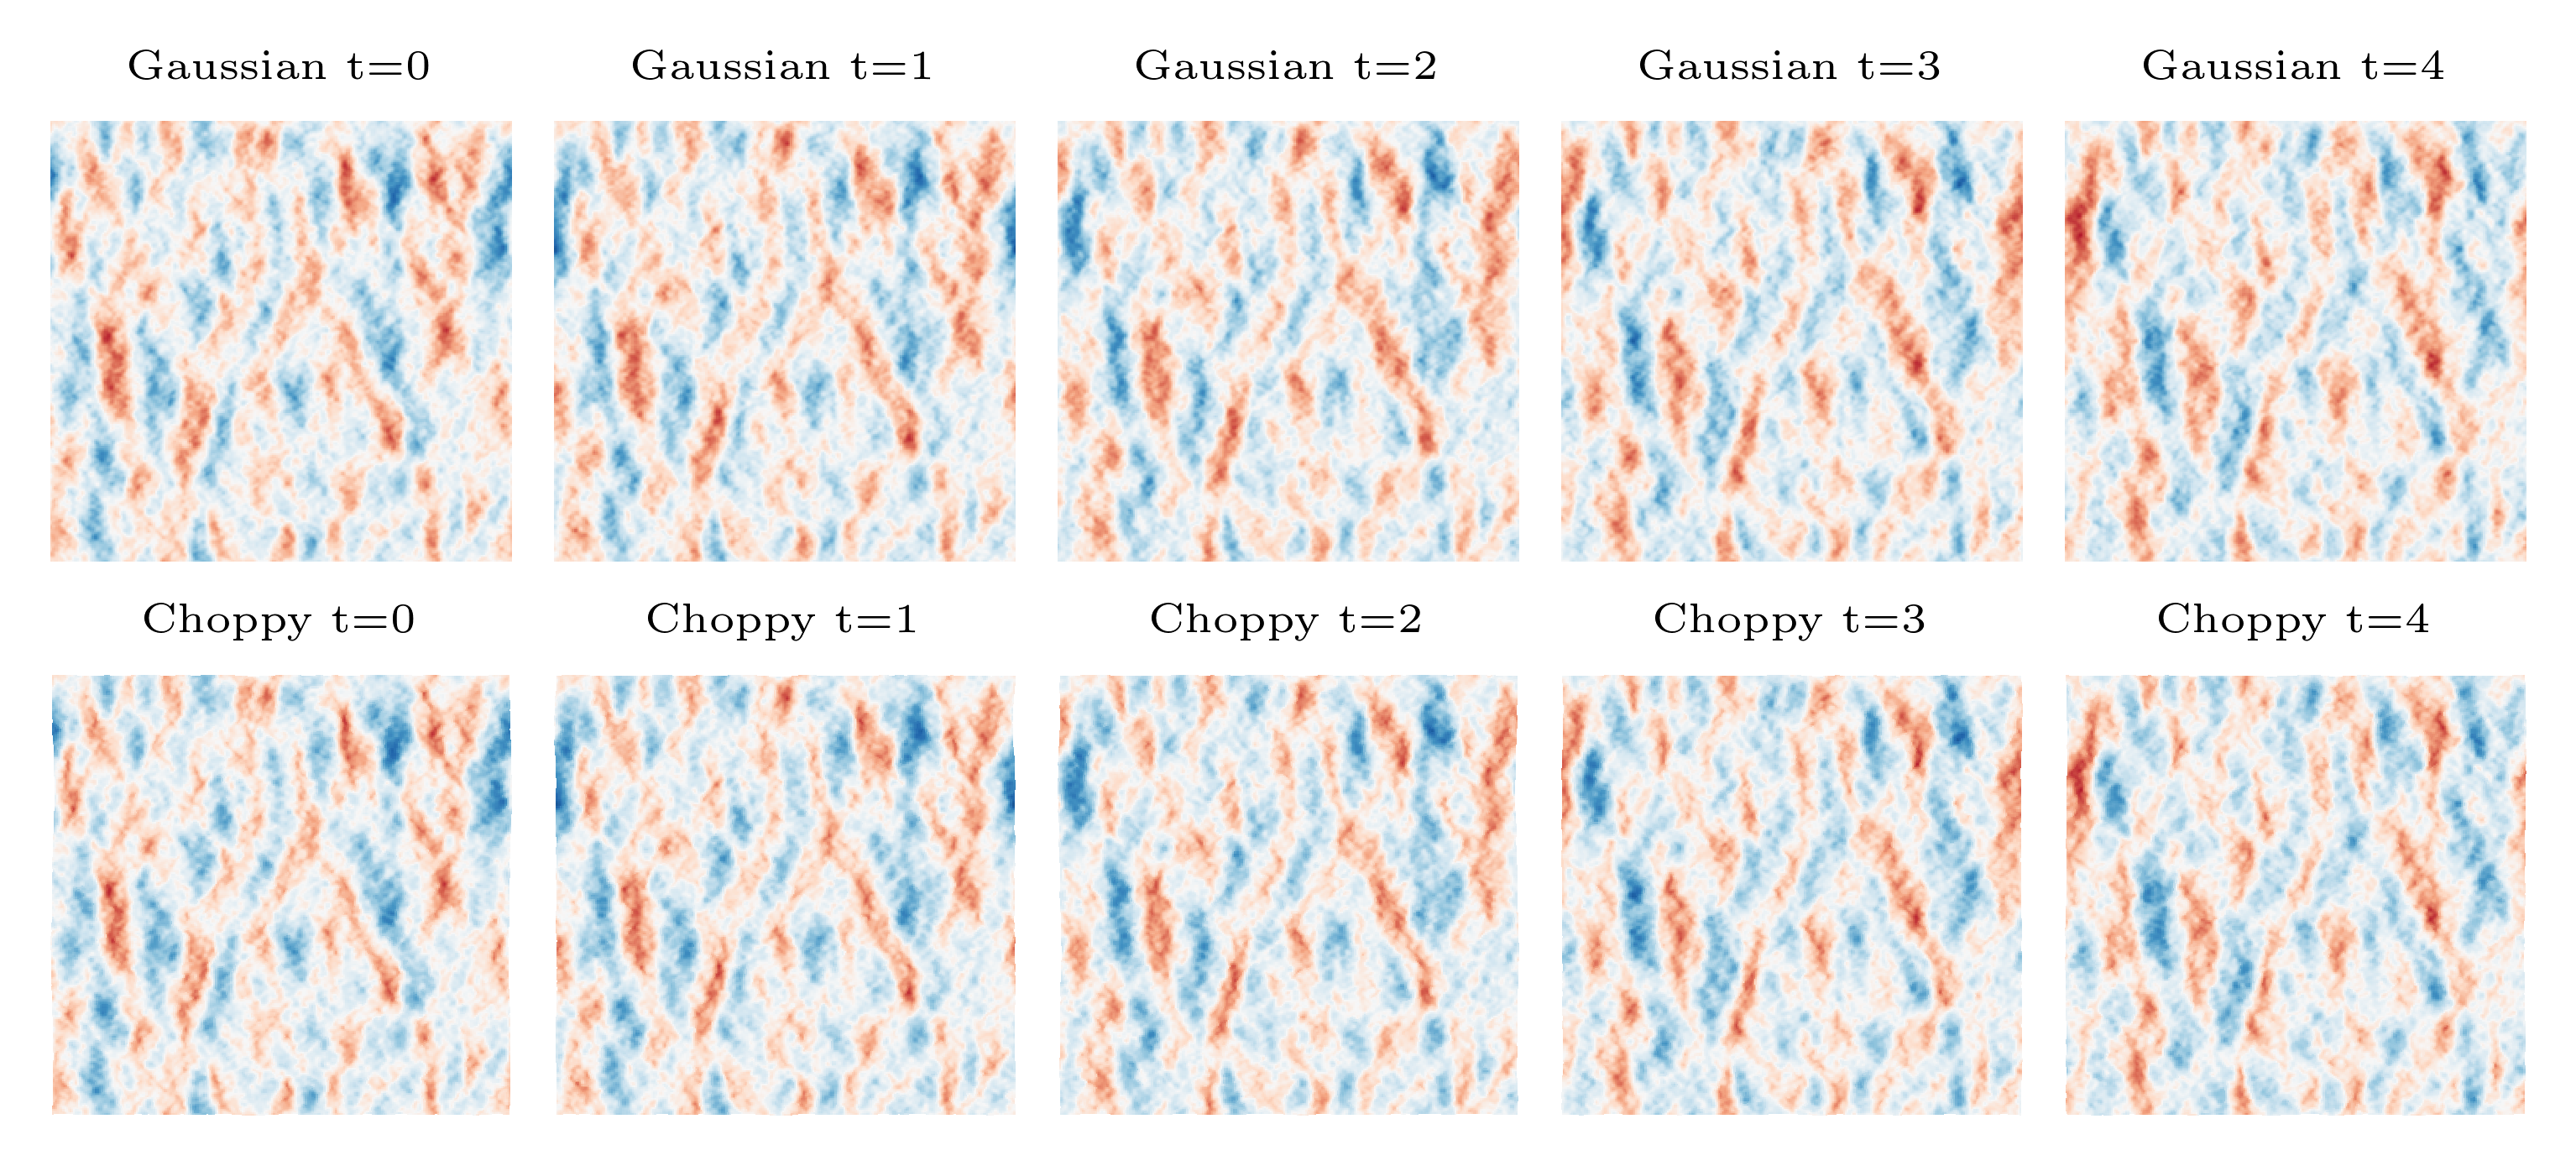

In [38]:
fig, axes = plt.subplots(2,5,figsize=[5,2.2],layout="constrained")

for i in range(0,5):
    t = i
    axes[0,i].pcolormesh(y_tile, x_tile, eta_frames[i], cmap='RdBu_r', vmax=1.6, vmin=-1.6)
    axes[0,i].set_title('Gaussian t=%g' %t, fontsize=6)
    axes[0,i].axis('off')
    axes[1,i].pcolormesh(y_tile+deltay_frames[i], x_tile+deltax_frames[i], eta_frames[i], cmap='RdBu_r', vmax=1.6, vmin=-1.6)
    axes[1,i].set_title('Choppy t=%g' %t, fontsize=6)
    axes[1,i].axis('off')

### The skewness of slope 
The skewness of slope seems to oscillate from the simulation output.

In [7]:
path = '/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_P0.02_RE40000_10_15_rand4_Htheta0.503/'
# path = '/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.01_RE40000_10_15_rand2_Htheta0.503/'

N = 1024; L = 200
x = np.linspace(-L/2,L/2,N); y = np.linspace(-L/2,L/2,N)
detadx3 = []
detadxdetady2 = []

for i in range(0,80):
    t = 120 + i
    filename = path + 'surface/eta_matrix_%g' %t
    eta = np.fromfile(filename, dtype=np.float32)
    eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]

    detadx = np.gradient(eta, axis=0)/(x[1]-x[0])
    detady = np.gradient(eta, axis=1)/(x[1]-x[0])
#     print('<detadx^3> = %.7f, <detadx*detady^2> = %.7f' 
#           %(np.average(detadx**3), np.average(detadx*detady**2)))
    detadx3.append(np.average(detadx**3))
    detadxdetady2.append(np.average(detadx*detady**2))

-1.4525831e-06
3.1707873e-06


(-0.0004, 0.0004)

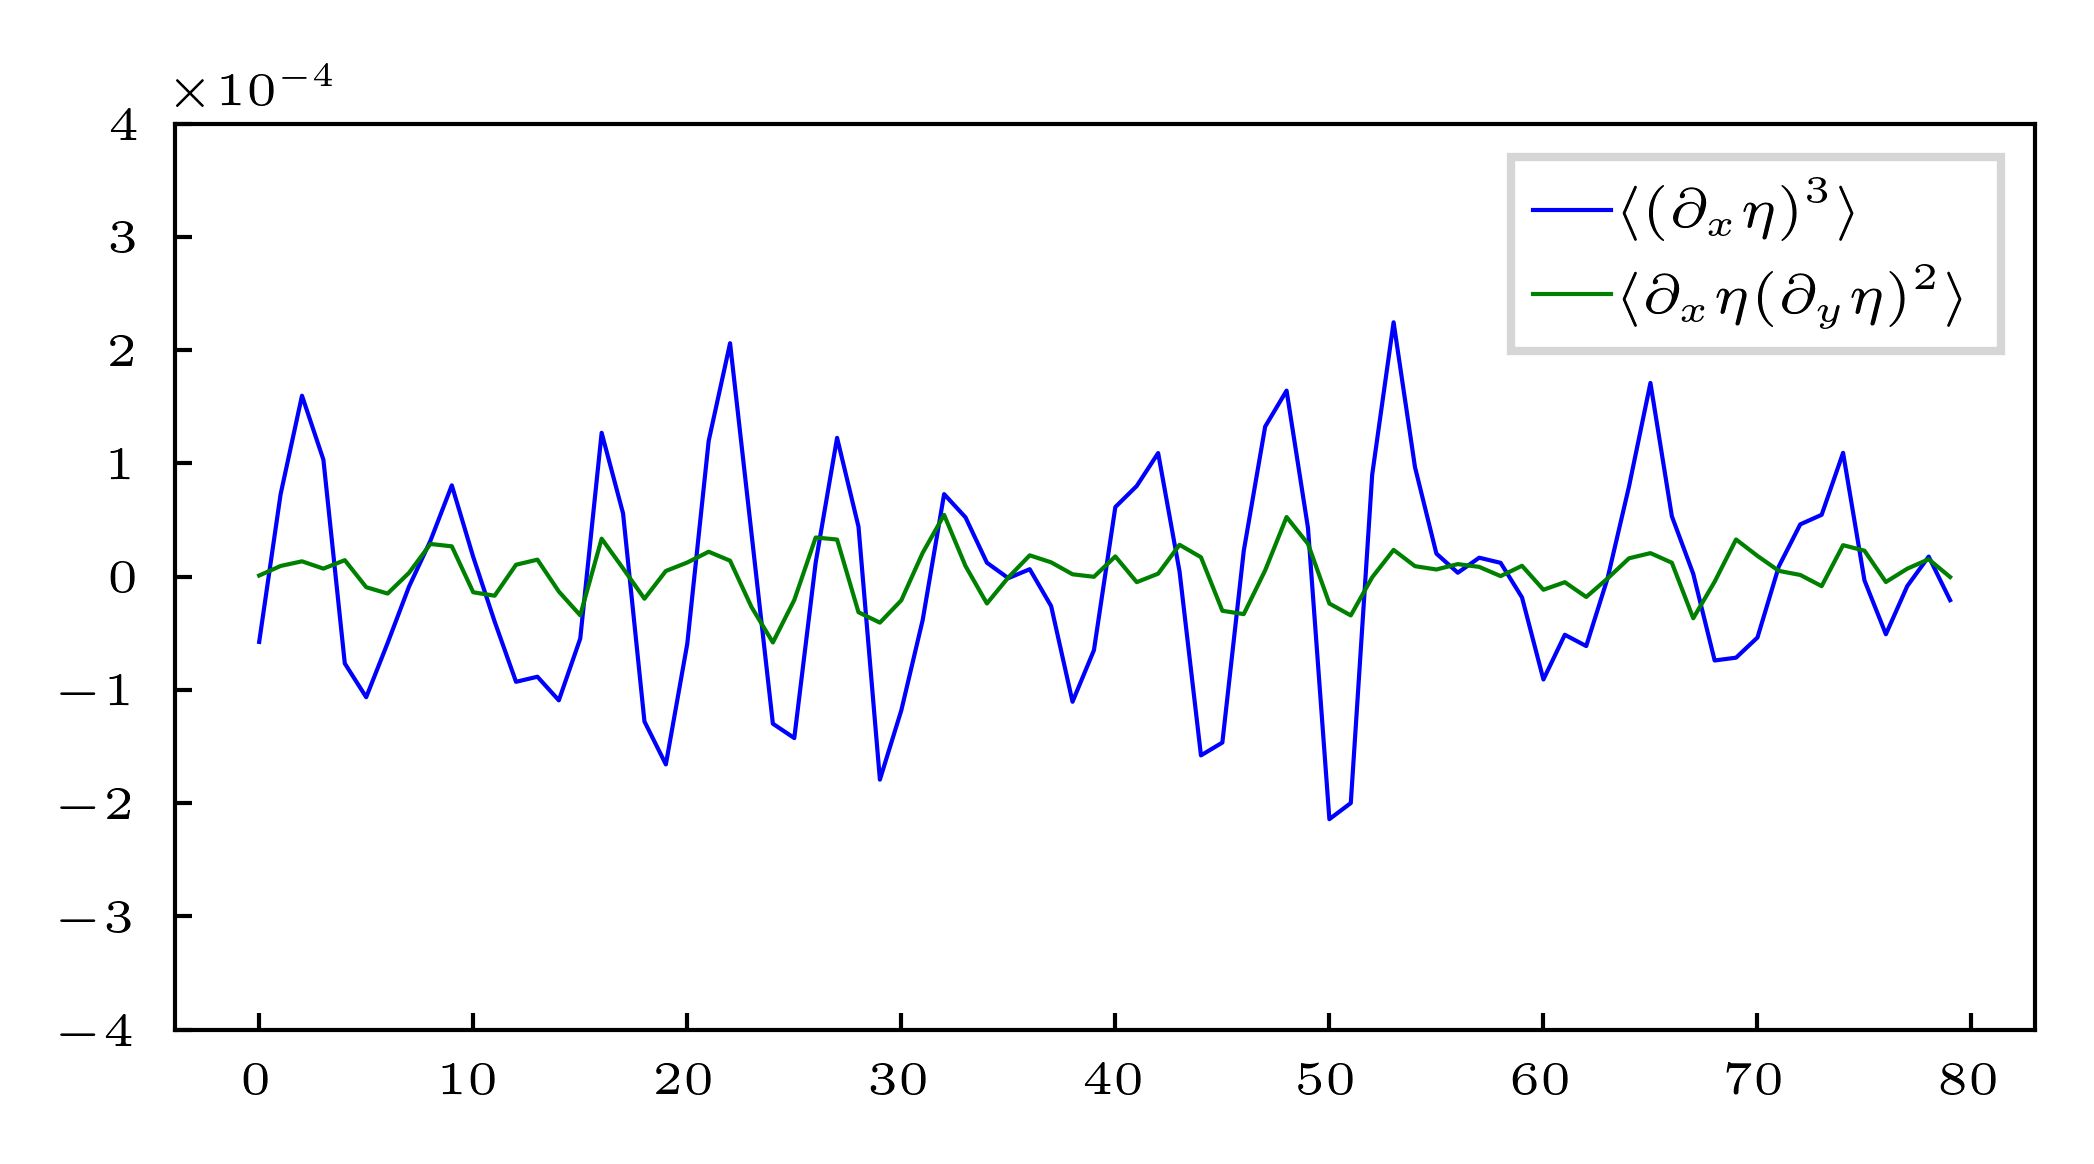

In [8]:
plt.figure(figsize=[4,2])
plt.plot(detadx3, label=r'$\langle (\partial_x \eta) ^3 \rangle$')
plt.plot(detadxdetady2, label=r'$\langle \partial_x \eta (\partial_y \eta)^2 \rangle$')
print(np.average(np.array(detadx3)))
print(np.average(np.array(detadxdetady2)))
plt.legend()
plt.ylim([-4*10**(-4), 4*10**(-4)])

### Write two consecutive frames (gave it to Bertrand)

In [44]:
np.arange(180,190,0.1)

array([180. , 180.1, 180.2, 180.3, 180.4, 180.5, 180.6, 180.7, 180.8,
       180.9, 181. , 181.1, 181.2, 181.3, 181.4, 181.5, 181.6, 181.7,
       181.8, 181.9, 182. , 182.1, 182.2, 182.3, 182.4, 182.5, 182.6,
       182.7, 182.8, 182.9, 183. , 183.1, 183.2, 183.3, 183.4, 183.5,
       183.6, 183.7, 183.8, 183.9, 184. , 184.1, 184.2, 184.3, 184.4,
       184.5, 184.6, 184.7, 184.8, 184.9, 185. , 185.1, 185.2, 185.3,
       185.4, 185.5, 185.6, 185.7, 185.8, 185.9, 186. , 186.1, 186.2,
       186.3, 186.4, 186.5, 186.6, 186.7, 186.8, 186.9, 187. , 187.1,
       187.2, 187.3, 187.4, 187.5, 187.6, 187.7, 187.8, 187.9, 188. ,
       188.1, 188.2, 188.3, 188.4, 188.5, 188.6, 188.7, 188.8, 188.9,
       189. , 189.1, 189.2, 189.3, 189.4, 189.5, 189.6, 189.7, 189.8,
       189.9])

In [50]:
path='/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_P0.02_RE40000_10_15_rand4_Htheta0.503/'


fig = plt.figure(figsize = [1.6,1.6])
N = 1024; L = 200; kp = 2*np.pi/(L/5); omegap = (9.8*kp)**0.5
print('kp=%g, omegap=%g' %(kp,omegap))

tseries = np.arange(180,184,0.1)
for i,t in enumerate((tseries)):
    print(t)
    filename = path + 'surface/eta_matrix_%g' %t
    eta = np.fromfile(filename, dtype=np.float32)
    eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]
    np.savetxt('Ifremer/smaller_samples/eta%.1f.txt' %t, eta, fmt='%0.6f')
    
#     filename = path + 'surface/ux_matrix_%g' %t
#     ux = np.fromfile(filename, dtype=np.float32)
#     ux = ux.reshape(N+1,N+1); ux = ux[1:,1:]
#     np.savetxt('Ifremer/samples/ux%.1f.txt' %t, ux, fmt='%0.6f')
    
#     filename = path + 'surface/uy_matrix_%g' %t
#     uy = np.fromfile(filename, dtype=np.float32)
#     uy = uy.reshape(N+1,N+1); uy = uy[1:,1:]
#     np.savetxt('Ifremer/samples/uy%.1f.txt' %t, uy, fmt='%0.6f')
    
#     filename = path + 'surface/w_matrix_%g' %t
#     uz = np.fromfile(filename, dtype=np.float32)
#     uz = uz.reshape(N+1,N+1); uz = uz[1:,1:]
#     np.savetxt('Ifremer/samples/uz%g.txt' %t, uz, fmt='%0.6f')

kp=0.15708, omegap=1.24072
180.0
180.1
180.2
180.29999999999998
180.39999999999998
180.49999999999997
180.59999999999997
180.69999999999996
180.79999999999995
180.89999999999995
180.99999999999994
181.09999999999994
181.19999999999993
181.29999999999993
181.39999999999992
181.49999999999991
181.5999999999999
181.6999999999999
181.7999999999999
181.8999999999999
181.9999999999999
182.09999999999988
182.19999999999987
182.29999999999987
182.39999999999986
182.49999999999986
182.59999999999985
182.69999999999985
182.79999999999984
182.89999999999984
182.99999999999983
183.09999999999982
183.19999999999982
183.2999999999998
183.3999999999998
183.4999999999998
183.5999999999998
183.6999999999998
183.79999999999978
183.89999999999978


<Figure size 960x960 with 0 Axes>